In [21]:
from neo4j import GraphDatabase, basic_auth

driver = GraphDatabase.driver(
  "bolt://localhost:7687",
  auth=basic_auth("neo4j", "password"))


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Direct Bearer shares vs CPI score 


In [4]:
num_bear = pd.read_csv('data/num_bear_plus_country.csv')
cpi = pd.read_csv('data/cpi2015.csv')
centrality = pd.read_csv('data/centrality_score.csv')
print(num_bear.shape[0])
print(cpi.shape[0])
bear_cpi = num_bear.merge(cpi,left_on='E.countries',right_on='Country')
sns.scatterplot(x='CPI score 2015',y='total',data= bear_cpi)
plt.show()
bear_cpi

FileNotFoundError: [Errno 2] No such file or directory: 'data/centrality_score.csv'

Clustering


<AxesSubplot:xlabel='CPI score 2015', ylabel='total'>

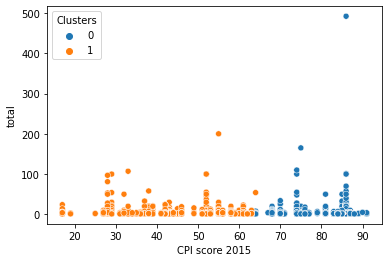

In [32]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(bear_cpi[['total','CPI score 2015']])
bear_cpi['Clusters']=kmeans.labels_
bear_cpi
sns.scatterplot(x='CPI score 2015',y='total',data=bear_cpi,hue='Clusters')

In [2]:
cypher_query = '''
MATCH (a:Officer {name:$name})-[r:officer_of|intermediary_of|registered_address*..10]-(b)
RETURN b.name as name LIMIT 20
'''

with driver.session(database="neo4j") as session:
  results = session.read_transaction(
    lambda tx: tx.run(cypher_query,
                      name="Ross, Jr. - Wilbur Louis").data())
  for record in results:
    print(record['name'])

driver.close()

Transaction failed and will be retried in 1.109834870106722s (Couldn't connect to localhost:7687 (resolved to ('[::1]:7687', '127.0.0.1:7687')):
Failed to establish connection to ResolvedIPv6Address(('::1', 7687, 0, 0)) (reason [WinError 10061] No connection could be made because the target machine actively refused it)
Failed to establish connection to ResolvedIPv4Address(('127.0.0.1', 7687)) (reason [WinError 10061] No connection could be made because the target machine actively refused it))
Transaction failed and will be retried in 1.8620994565393134s (Couldn't connect to localhost:7687 (resolved to ('[::1]:7687', '127.0.0.1:7687')):
Failed to establish connection to ResolvedIPv6Address(('::1', 7687, 0, 0)) (reason [WinError 10061] No connection could be made because the target machine actively refused it)
Failed to establish connection to ResolvedIPv4Address(('127.0.0.1', 7687)) (reason [WinError 10061] No connection could be made because the target machine actively refused it))
Tra

KeyboardInterrupt: 

In [33]:
import requests
import pandas as pd
data_params = {
    'q':'Mossack Fonseca',
    'api_token': 'ysyigAGAdYml7u4idgZ5'
}
result = requests.get( 'https://api.opencorporates.com/companies/search',params=data_params)
bv = result.json()


Labeling of nodes


In [36]:
def duration_activity(name):
    print(name)
    data_params = {
    'q':name
    }   
    result = requests.get( 'https://api.opencorporates.com/companies/search',params=data_params)

    bv = result.json()
    print(bv)
    if len(bv['results']['companies']) == 0:
        return None,None
    incorp = bv['results']['companies'][0]['company']['incorporation_date']
    dissolute = bv['results']['companies'][0]['company']['dissolution_date']
    activity = bv['results']['companies'][0]['company']['inactive']
    print(activity)



mossack fonseca
{'api_version': '0.4.8', 'results': {'companies': [{'company': {'name': 'CONIFER RIDGE LIMITED', 'company_number': '02942205', 'jurisdiction_code': 'gb', 'incorporation_date': '1994-06-23', 'dissolution_date': '2020-09-22', 'company_type': 'Private Limited Company', 'registry_url': 'https://beta.companieshouse.gov.uk/company/02942205', 'branch': None, 'branch_status': None, 'inactive': True, 'current_status': 'Dissolved', 'created_at': '2010-10-22T20:03:56+00:00', 'updated_at': '2020-09-23T11:09:39+00:00', 'retrieved_at': '2020-09-23T11:09:37+00:00', 'opencorporates_url': 'https://opencorporates.com/companies/gb/02942205', 'previous_names': [{'company_name': 'OAKWOOD EDGE LIMITED', 'start_date': '2017-12-04', 'end_date': '2018-01-24'}, {'company_name': 'DESERT ROAD LIMITED', 'start_date': '2017-11-21', 'end_date': '2017-12-04'}, {'company_name': 'SYCAMORE LANE LIMITED', 'start_date': '2017-11-07', 'end_date': '2017-11-21'}, {'company_name': 'MOSSACK FONSECA & CO. (U.K.)

In [ ]:
from datetime import datetime

def duration_activity(name):
    print(name)
    data_params = {
    'q':name
    }   
    result = requests.get( 'https://api.opencorporates.com/companies/search',params=data_params)

    bv = result.json()
    print(bv)
    if len(bv['results']['companies']) == 0:
        return None,None
    incorp = bv['results']['companies'][0]['company']['incorporation_date']
    dissolute = bv['results']['companies'][0]['company']['dissolution_date']
    activity = bv['results']['companies'][0]['company']['inactive']
    if activity == None:
        activity = None
    else:
        activity = bv['results']['companies'][0]['company']['inactive']
        
    if incorp == None or dissolute == None:
          return activity,None 
    else: 
        dt_start = datetime.strptime( incorp, "%Y-%m-%d")
        dt_end = datetime.strptime( dissolute, "%Y-%m-%d")
    duration = dt_end.year-dt_start.year
    return activity,duration 

print(duration_activity('3 DIP S.A'))

3 DIP S.A
{'api_version': '0.4.8', 'results': {'companies': [{'company': {'name': '3 DIP S.A.', 'company_number': '554501', 'jurisdiction_code': 'pa', 'incorporation_date': '2007-02-06', 'dissolution_date': None, 'company_type': 'SOCIEDAD ANONIMA', 'registry_url': 'http://www.registro-publico.gob.pa/consultasweb/api/index.php/ObtenerFolio/1606723/1', 'branch': None, 'branch_status': None, 'inactive': False, 'current_status': 'Suspendido', 'created_at': '2011-06-19T11:21:12+00:00', 'updated_at': '2021-03-19T03:23:59+00:00', 'retrieved_at': '2021-03-19T01:05:48+00:00', 'opencorporates_url': 'https://opencorporates.com/companies/pa/554501', 'previous_names': [], 'source': {'publisher': 'Registro Público de Panamá', 'url': 'http://www.registro-publico.gob.pa/consultasweb/api/index.php/ObtenerFolio/1606723/1', 'retrieved_at': '2021-03-19T01:05:48+00:00'}, 'registered_address': {'street_address': 'PROVINCIA PANAMÁ', 'locality': None, 'region': None, 'postal_code': None, 'country': 'Panama'},

In [ ]:
import pandas as pd
num_bears = pd.read_csv('data/num_bear.csv')
num_bears

,entity,num_bearer
0,VELA GAS INVESTMENTS LTD.,492.0
1,GNG LTD.,200.0
2,BOB AGENTS LIMITED,165.0
3,3 DIP S.A.,110.0
4,INGELSA LTD.,107.0
...,...,...
30693,CHORLEY SERVICES LIMITED,1.0
30694,BEAUVIER LTD.,1.0
30695,ATALAMA S.A.,1.0
30696,TETRA INTERNATIONAL LTD.,1.0


In [9]:
new_df = pd.read_csv('data/num_bear_plus_country')
new_df.groupby('E.countries').count()['total'].sort_values()
print(new_df.shape[0])

hello


In [ ]:
activites = []
durations = []
for i in range (20):
    name= num_bears['entity'].iloc[i]
    values = duration_activity(name)
    activites.append(values[0])
    durations.append(values[1])
  
    

VELA GAS INVESTMENTS LTD.
<Response [200]>
GNG LTD.
<Response [200]>
BOB AGENTS LIMITED
<Response [200]>
3 DIP S.A.
<Response [200]>
INGELSA LTD.
<Response [200]>
ALDEBARAN ASSET MANAGEMENT LTD.
<Response [200]>
AMANZI CORPORATION
<Response [200]>
CAPOMONDO INTERNATIONAL LTD.
<Response [200]>
WINESELECTION S.A.
<Response [200]>
EARLY BIRD LIMITED
<Response [200]>
VS Investments Limited
<Response [200]>
MEGATRONIC SERVICES S.A.
<Response [200]>
NOBLE MOBILE LTD.
<Response [200]>
AZARD SERVICES LTD.
<Response [200]>
LYNX CONSULTANTS INC.
<Response [200]>
KEINES INVESTMENTS LIMITED
<Response [200]>
SUNAIR ELECTRONICS IBEROAMERICA INC.
<Response [200]>
ROKA RWANDA COLUMBO TANTALITE COLTAN III CORP
<Response [200]>
JUMP.COM HOLDING INC.
<Response [200]>
ROKA RWANDA COLUMBO TANTALITE COLTAN II CORP.
<Response [200]>


In [ ]:
activites
durations

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 5,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:

data_params = {
    'q':'VELA GAS INVESTMENTS LTD.'
    }   
result = requests.get( 'https://api.opencorporates.com/companies/search',params=data_params)
bv = result.json()
bv['results']['companies']

[]

In [ ]:
ex = num_bears[:len(activites)]
ex['duration'] = durations
ex['active'] = activites
ex

ValueError: Length of values (0) does not match length of index (60)